In [1]:
# basic dependencies

import numpy as np
from numpy import loadtxt
from numpy import savetxt

import pandas as pd
import math
import time

np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})

###########

# plotting dependencies
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

# this is for the colorbar, you can change the cmap if you prefer other colour schemes
from matplotlib.cm import ScalarMappable
cm = plt.cm.get_cmap('viridis')

# function to return the std dev across runs
def ci(y, N_TRIALS):
    return 1.96 * y.std(axis=0) / np.sqrt(N_TRIALS)

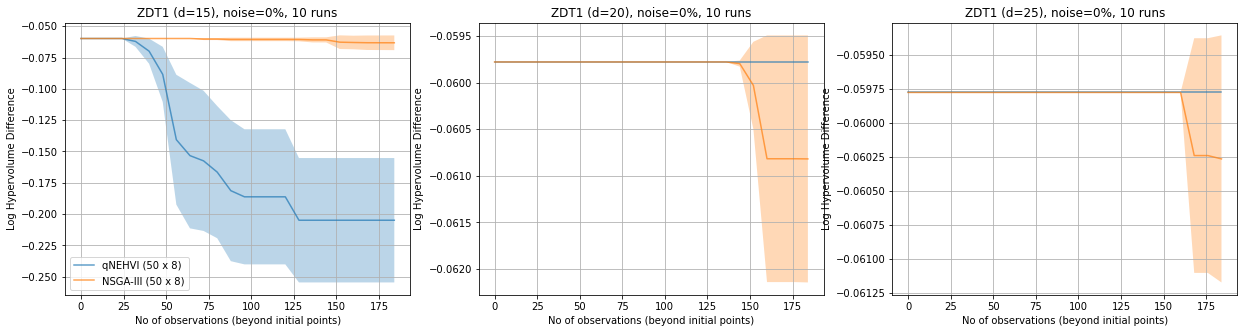

In [2]:
problem = "ZDT1"
max_hv = 0.8714093689206742

hv_qnehvi_all = loadtxt(f"{problem}_hvs_qnehvi_dim15.csv", delimiter=',')
hv_nsga3_all = loadtxt(f"{problem}_hvs_nsga3_dim15.csv", delimiter=',')
hv_qnehvi_plot0 = np.log10(max_hv - np.asarray(hv_qnehvi_all)[...,:24]) 
hv_nsga3_plot0 = np.log10(max_hv - np.asarray(hv_nsga3_all)[...,:24]) 

hv_qnehvi_all = loadtxt(f"{problem}_hvs_qnehvi_dim20.csv", delimiter=',')
hv_nsga3_all = loadtxt(f"{problem}_hvs_nsga3_dim20.csv", delimiter=',')
hv_qnehvi_plot1 = np.log10(max_hv - np.asarray(hv_qnehvi_all)[...,:24]) 
hv_nsga3_plot1 = np.log10(max_hv - np.asarray(hv_nsga3_all)[...,:24]) 

hv_qnehvi_all = loadtxt(f"{problem}_hvs_qnehvi_dim25.csv", delimiter=',')
hv_nsga3_all = loadtxt(f"{problem}_hvs_nsga3_dim25.csv", delimiter=',')
hv_qnehvi_plot2 = np.log10(max_hv - np.asarray(hv_qnehvi_all)[...,:24]) 
hv_nsga3_plot2 = np.log10(max_hv - np.asarray(hv_nsga3_all)[...,:24]) 

dimlist = [15,20,25]
qnehvilist = [hv_qnehvi_plot0,hv_qnehvi_plot1,hv_qnehvi_plot2]
nsga3list = [hv_nsga3_plot0,hv_nsga3_plot1,hv_nsga3_plot2]

fig, ax = plt.subplots(1, 3, figsize=(21, 5))
for i, dim, hv_qnehvi_plot, hv_nsga3_plot in zip(range(len(dimlist)), dimlist, qnehvilist, nsga3list):
    ax[i].plot(np.arange(24)*8,
        hv_qnehvi_plot.mean(axis=0),
        label=f'qNEHVI (50 x 8)', linewidth=1.5, alpha=0.7)
    
    ax[i].fill_between(np.arange(24)*8,
                    hv_qnehvi_plot.mean(axis=0)-ci(hv_qnehvi_plot, 10), hv_qnehvi_plot.mean(axis=0)+ci(hv_qnehvi_plot, 10),
                    alpha=0.3)

    ax[i].plot(np.arange(24)*8,
            hv_nsga3_plot.mean(axis=0),
            label=f'NSGA-III (50 x 8)', linewidth=1.5, alpha=0.7)

    ax[i].fill_between(np.arange(24)*8,
                    hv_nsga3_plot.mean(axis=0)-ci(hv_nsga3_plot, 10), hv_nsga3_plot.mean(axis=0)+ci(hv_nsga3_plot, 10),
                    alpha=0.3)

    ax[i].set(xlabel='No of observations (beyond initial points)', ylabel='Log Hypervolume Difference')
    ax[i].grid(True)
    ax[i].set_title(f"ZDT1 (d={dim}), noise=0%, 10 runs")

ax[0].legend(loc='best')

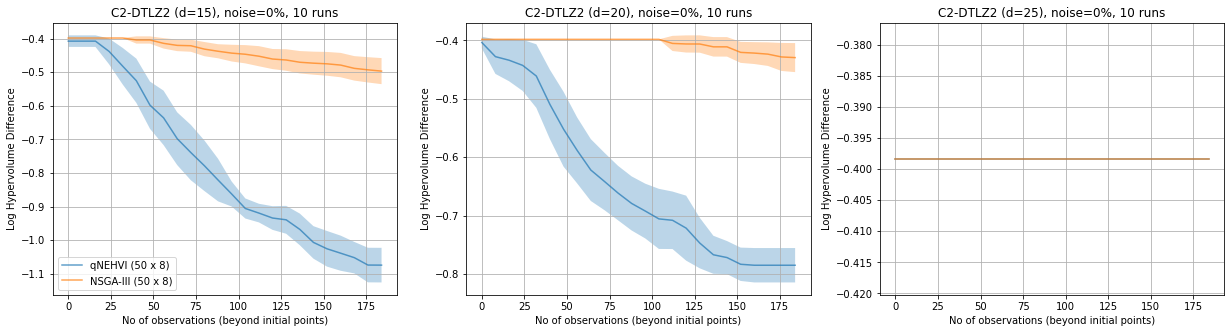

In [3]:
problem = "C2DTLZ2"
max_hv = 0.3996406303723544

hv_qnehvi_all = loadtxt(f"{problem}_hvs_qnehvi_dim15.csv", delimiter=',')
hv_nsga3_all = loadtxt(f"{problem}_hvs_nsga3_dim15.csv", delimiter=',')
hv_qnehvi_plot0 = np.log10(max_hv - np.asarray(hv_qnehvi_all)[...,:24]) 
hv_nsga3_plot0 = np.log10(max_hv - np.asarray(hv_nsga3_all)[...,:24]) 

hv_qnehvi_all = loadtxt(f"{problem}_hvs_qnehvi_dim20.csv", delimiter=',')
hv_nsga3_all = loadtxt(f"{problem}_hvs_nsga3_dim20.csv", delimiter=',')
hv_qnehvi_plot1 = np.log10(max_hv - np.asarray(hv_qnehvi_all)[...,:24]) 
hv_nsga3_plot1 = np.log10(max_hv - np.asarray(hv_nsga3_all)[...,:24]) 

hv_qnehvi_all = loadtxt(f"{problem}_hvs_qnehvi_dim25.csv", delimiter=',')
hv_nsga3_all = loadtxt(f"{problem}_hvs_nsga3_dim25.csv", delimiter=',')
hv_qnehvi_plot2 = np.log10(max_hv - np.asarray(hv_qnehvi_all)[...,:24]) 
hv_nsga3_plot2 = np.log10(max_hv - np.asarray(hv_nsga3_all)[...,:24]) 

dimlist = [15,20,25]
qnehvilist = [hv_qnehvi_plot0,hv_qnehvi_plot1,hv_qnehvi_plot2]
nsga3list = [hv_nsga3_plot0,hv_nsga3_plot1,hv_nsga3_plot2]

fig, ax = plt.subplots(1, 3, figsize=(21, 5))
for i, dim, hv_qnehvi_plot, hv_nsga3_plot in zip(range(len(dimlist)), dimlist, qnehvilist, nsga3list):
    ax[i].plot(np.arange(24)*8,
        hv_qnehvi_plot.mean(axis=0),
        label=f'qNEHVI (50 x 8)', linewidth=1.5, alpha=0.7)
    
    ax[i].fill_between(np.arange(24)*8,
                    hv_qnehvi_plot.mean(axis=0)-ci(hv_qnehvi_plot, 10), hv_qnehvi_plot.mean(axis=0)+ci(hv_qnehvi_plot, 10),
                    alpha=0.3)

    ax[i].plot(np.arange(24)*8,
            hv_nsga3_plot.mean(axis=0),
            label=f'NSGA-III (50 x 8)', linewidth=1.5, alpha=0.7)

    ax[i].fill_between(np.arange(24)*8,
                    hv_nsga3_plot.mean(axis=0)-ci(hv_nsga3_plot, 10), hv_nsga3_plot.mean(axis=0)+ci(hv_nsga3_plot, 10),
                    alpha=0.3)

    ax[i].set(xlabel='No of observations (beyond initial points)', ylabel='Log Hypervolume Difference')
    ax[i].grid(True)
    ax[i].set_title(f"C2-DTLZ2 (d={dim}), noise=0%, 10 runs")

ax[0].legend(loc='best')

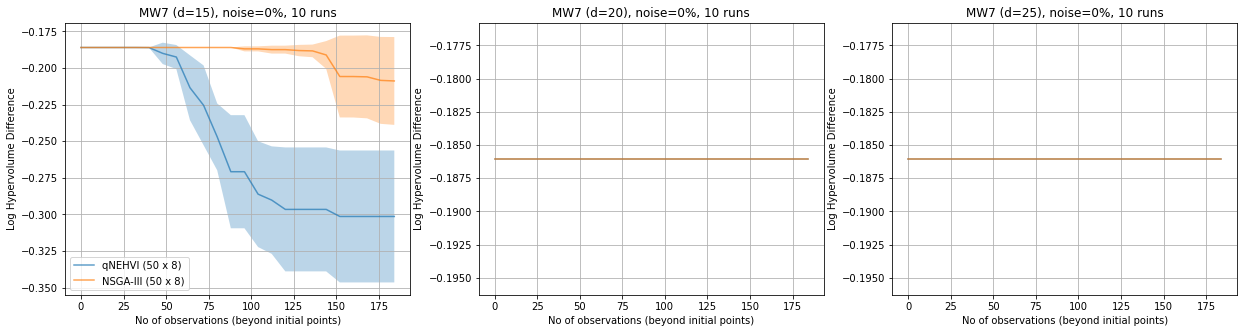

In [4]:
problem = "MW7"
max_hv = 0.6515622081235817

hv_qnehvi_all = loadtxt(f"{problem}_hvs_qnehvi_dim15.csv", delimiter=',')
hv_nsga3_all = loadtxt(f"{problem}_hvs_nsga3_dim15.csv", delimiter=',')
hv_qnehvi_plot0 = np.log10(max_hv - np.asarray(hv_qnehvi_all)[...,:24]) 
hv_nsga3_plot0 = np.log10(max_hv - np.asarray(hv_nsga3_all)[...,:24]) 

hv_qnehvi_all = loadtxt(f"{problem}_hvs_qnehvi_dim20.csv", delimiter=',')
hv_nsga3_all = loadtxt(f"{problem}_hvs_nsga3_dim20.csv", delimiter=',')
hv_qnehvi_plot1 = np.log10(max_hv - np.asarray(hv_qnehvi_all)[...,:24]) 
hv_nsga3_plot1 = np.log10(max_hv - np.asarray(hv_nsga3_all)[...,:24]) 

hv_qnehvi_all = loadtxt(f"{problem}_hvs_qnehvi_dim25.csv", delimiter=',')
hv_nsga3_all = loadtxt(f"{problem}_hvs_nsga3_dim25.csv", delimiter=',')
hv_qnehvi_plot2 = np.log10(max_hv - np.asarray(hv_qnehvi_all)[...,:24]) 
hv_nsga3_plot2 = np.log10(max_hv - np.asarray(hv_nsga3_all)[...,:24]) 

dimlist = [15,20,25]
qnehvilist = [hv_qnehvi_plot0,hv_qnehvi_plot1,hv_qnehvi_plot2]
nsga3list = [hv_nsga3_plot0,hv_nsga3_plot1,hv_nsga3_plot2]

fig, ax = plt.subplots(1, 3, figsize=(21, 5))
for i, dim, hv_qnehvi_plot, hv_nsga3_plot in zip(range(len(dimlist)), dimlist, qnehvilist, nsga3list):
    ax[i].plot(np.arange(24)*8,
        hv_qnehvi_plot.mean(axis=0),
        label=f'qNEHVI (50 x 8)', linewidth=1.5, alpha=0.7)
    
    ax[i].fill_between(np.arange(24)*8,
                    hv_qnehvi_plot.mean(axis=0)-ci(hv_qnehvi_plot, 10), hv_qnehvi_plot.mean(axis=0)+ci(hv_qnehvi_plot, 10),
                    alpha=0.3)

    ax[i].plot(np.arange(24)*8,
            hv_nsga3_plot.mean(axis=0),
            label=f'NSGA-III (50 x 8)', linewidth=1.5, alpha=0.7)

    ax[i].fill_between(np.arange(24)*8,
                    hv_nsga3_plot.mean(axis=0)-ci(hv_nsga3_plot, 10), hv_nsga3_plot.mean(axis=0)+ci(hv_nsga3_plot, 10),
                    alpha=0.3)

    ax[i].set(xlabel='No of observations (beyond initial points)', ylabel='Log Hypervolume Difference')
    ax[i].grid(True)
    ax[i].set_title(f"MW7 (d={dim}), noise=0%, 10 runs")

ax[0].legend(loc='best')